In [ ]:
#Question 3

Please see the handwritten solution at the end of the document.

In [ ]:
#Question 4

Please see the handwritten solution at the end of the document.

In [ ]:
#Question 6

Please see the handwritten solution at the end of the document.

In [ ]:
#Question 11

#Load the ISLR library
library(ISLR)

#Load the Auto dataset
Auto

In [3]:
#Part A

mpg01 <- rep(0, length(Auto$mpg))
mpg01[Auto$mpg > median(Auto$mpg)] <- 1
Auto <- data.frame(Auto, mpg01)

In [4]:
#Part B

#Remove the name and mpg01 column from the correlation matrix
cor(Auto[,-c(9,10)])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


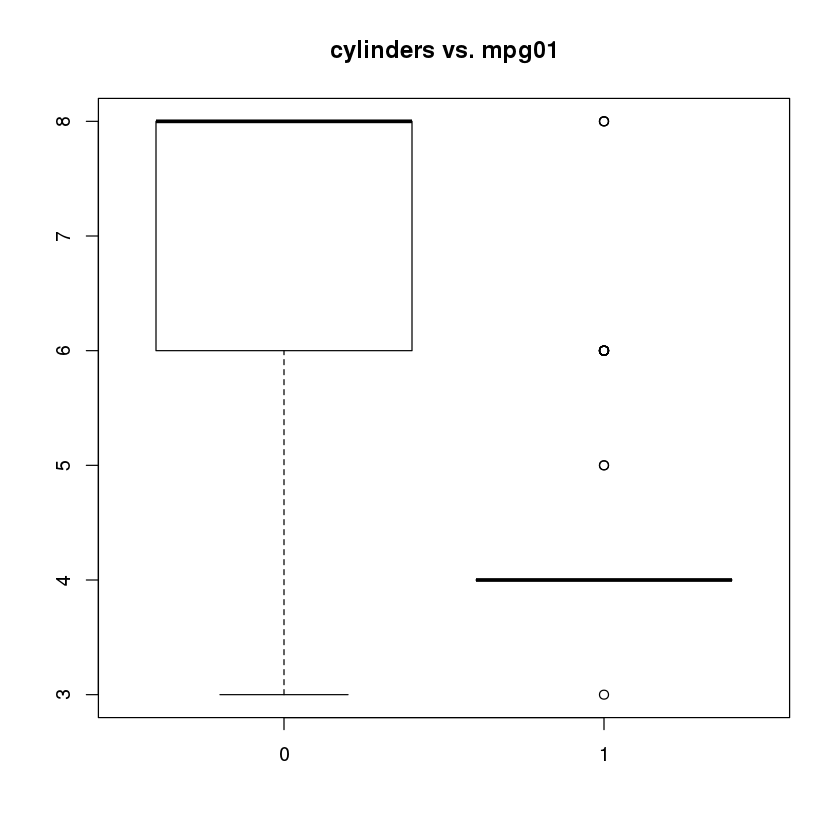

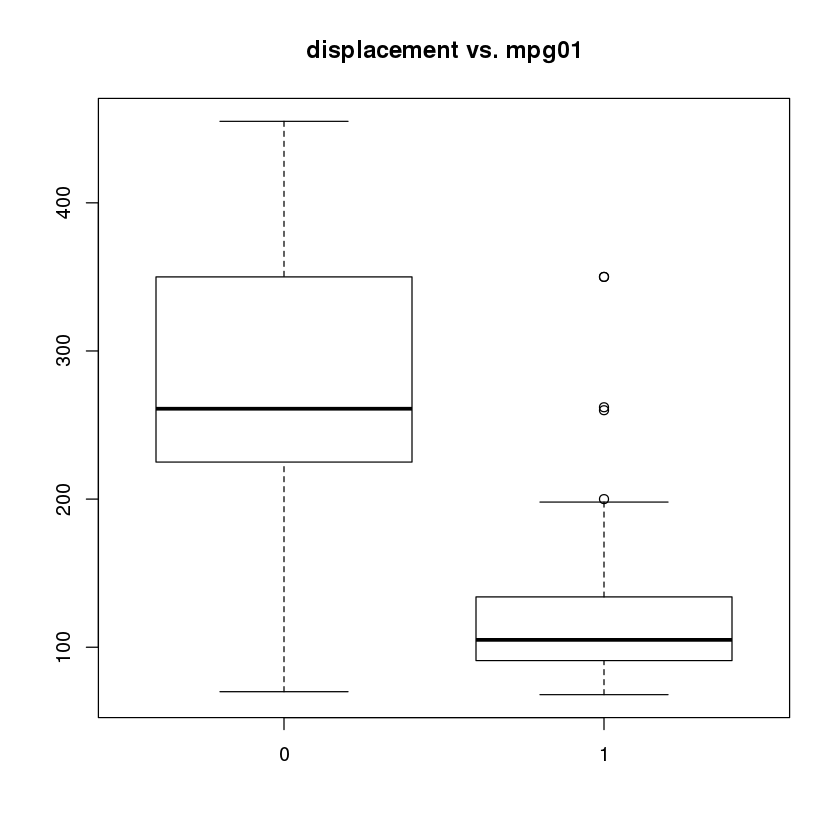

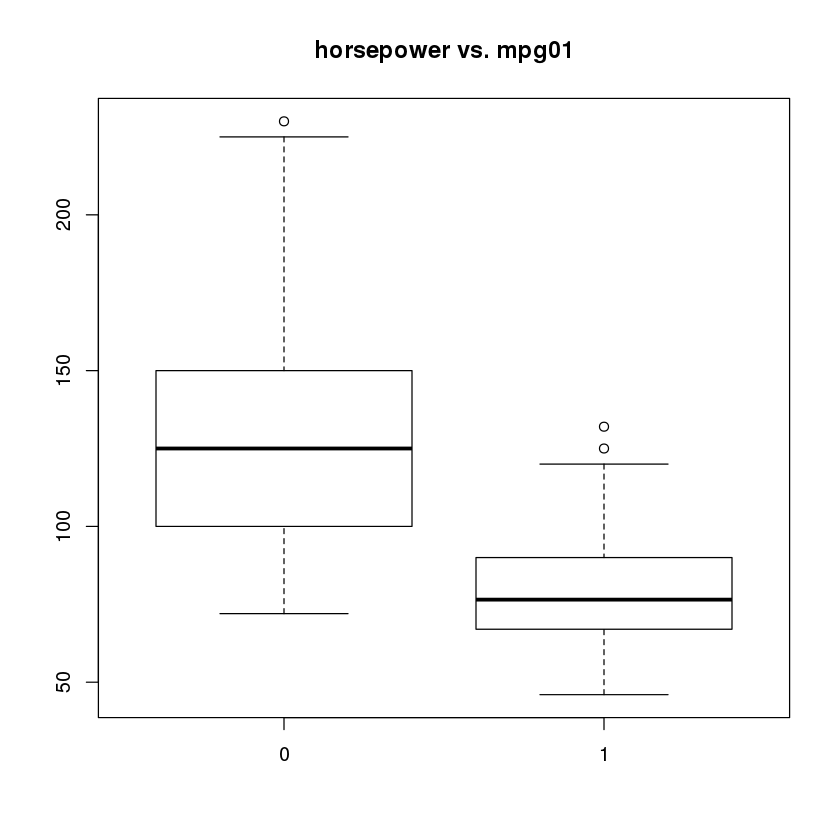

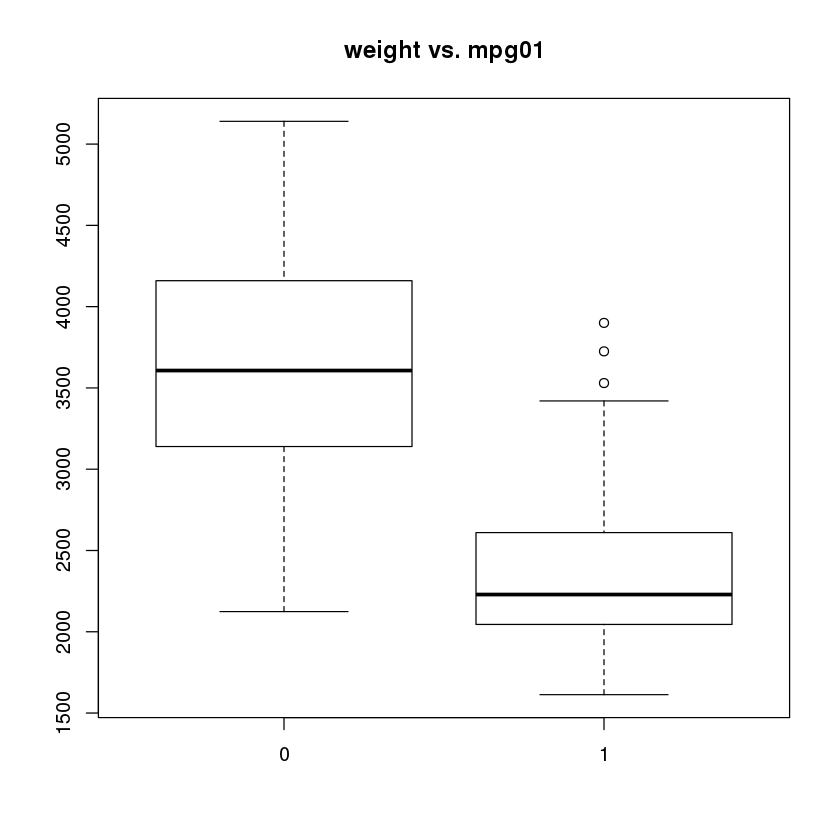

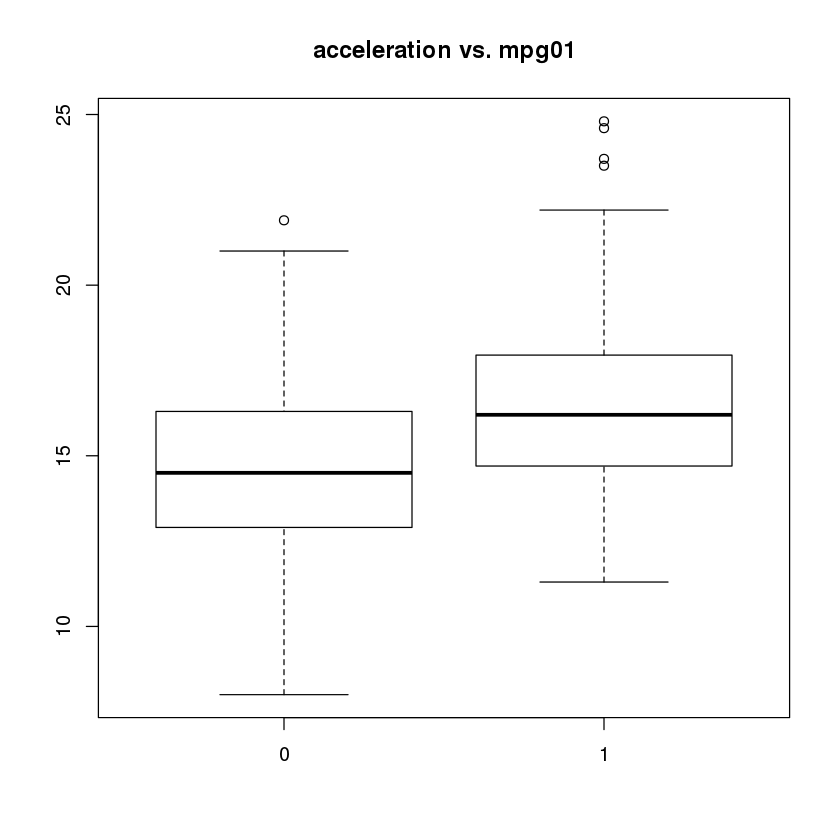

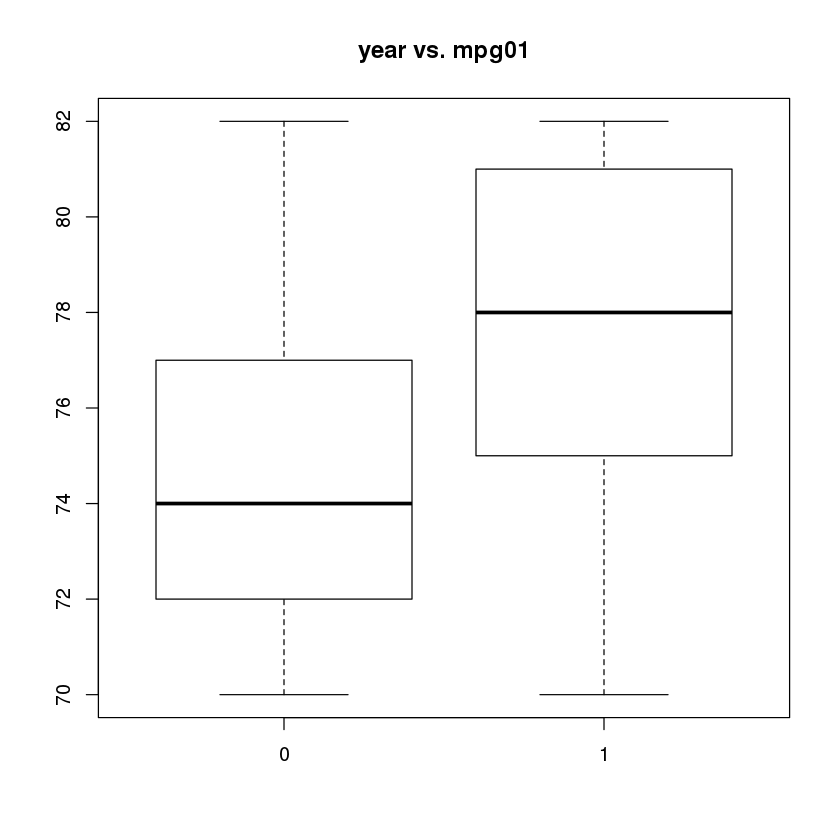

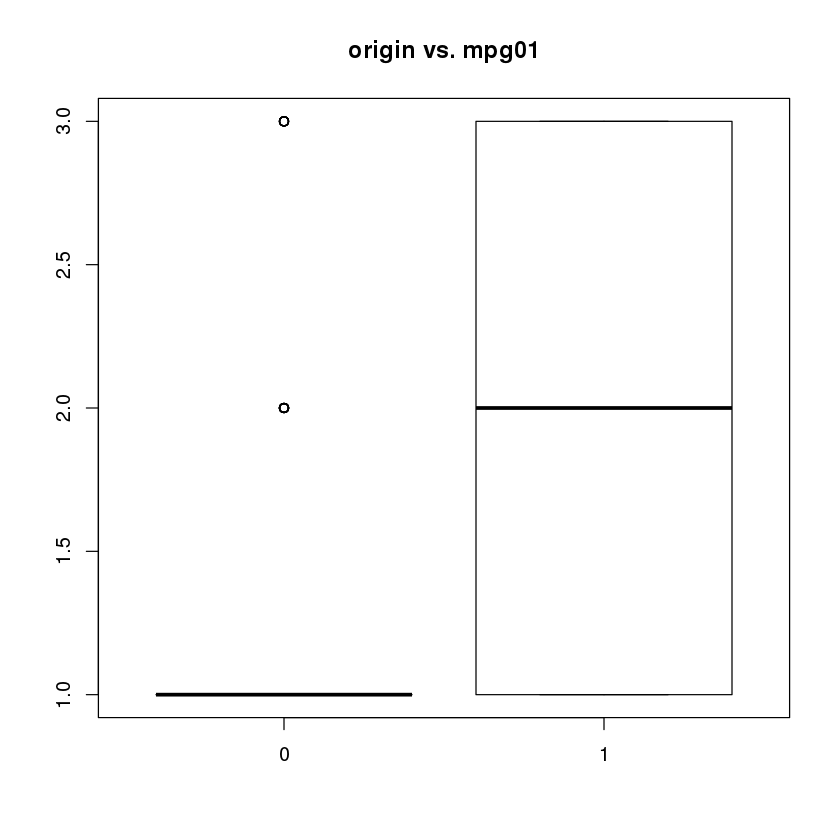

In [5]:
#Boxplots for mpg01 and other variables in Auto
boxplot(cylinders ~ mpg01, data = Auto, main = "cylinders vs. mpg01")
boxplot(displacement ~ mpg01, data = Auto, main = "displacement vs. mpg01")
boxplot(horsepower ~ mpg01, data = Auto, main = "horsepower vs. mpg01")
boxplot(weight ~ mpg01, data = Auto, main = "weight vs. mpg01")
boxplot(acceleration ~ mpg01, data = Auto, main = "acceleration vs. mpg01")
boxplot(year ~ mpg01, data = Auto, main = "year vs. mpg01")
boxplot(origin ~ mpg01, data = Auto, main = "origin vs. mpg01")

In [ ]:
Based on the correlation matrix and boxplots, the variables that are
most useful in predicting mpg01 are: cylinders (r=-0.78), displacement
(r=-0.81), horsepower (r=-0.78), and weight (r=-0.83). As each of these
variables increases, mpg01 decreases (i.e. is more likely to be below
the median value). The boxplots reveal similar findings as there is no
overlap between the two plots for mpg01=0 and mpg01=1 in any of those
cases.

In [ ]:
#Part C

To split the dataset without introducing significant bias, it should be
split using a variable that is not strongly correlated with mpg01. In this
case, the variable "year" has a moderate correlation with mpg01, so to make
up for this, the dataset will be split so that the training set consists of
even years, and the test set consists of odd years.

In [7]:
#Splitting the dataset
train <- (Auto$year %% 2 == 0)
Auto.TrainingData <- Auto[train,]
Auto.TestingData <- Auto[!train,]
mpg01.TestingData <- mpg01[!train]

In [8]:
#Part D

#Load the MASS library
library(MASS)
LDA <- lda(mpg01~cylinders+weight+displacement+horsepower, data=Auto, subset=train)
LDA

Call:
lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower
0  6.812500 3604.823     271.7396  133.14583
1  4.070175 2314.763     111.6623   77.92105

Coefficients of linear discriminants:
                       LD1
cylinders    -0.6741402638
weight       -0.0011465750
displacement  0.0004481325
horsepower    0.0059035377

In [9]:
#Using the test set, we can now see how the LDA performs with respect to
#predicting mpg01
prediction1 <- predict(LDA, Auto.TestingData)

#Finally, we can tabulate the predictions to assess the model's effectiveness
ConfusionTable1 <- table(prediction1$class, mpg01.TestingData)
print(ConfusionTable1)

   mpg01.TestingData
     0  1
  0 86  9
  1 14 73


In [26]:
#The test error rate can then be calculated as follows
ErrorRateLDA <- 1 - ((86+73)/sum(86, 9, 14, 73))
print(ErrorRateLDA)

[1] 0.1263736


In [10]:
#Part E

#Quadratic Discriminant Analysis
QDA <- qda(mpg01~cylinders+weight+displacement+horsepower, data=Auto, subset=train)
QDA

Call:
qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower
0  6.812500 3604.823     271.7396  133.14583
1  4.070175 2314.763     111.6623   77.92105

In [11]:
prediction2 <- predict(QDA, Auto.TestingData)
ConfusionTable2 <- table(prediction2$class, mpg01.TestingData)
print(ConfusionTable2)

   mpg01.TestingData
     0  1
  0 89 13
  1 11 69


In [12]:
ErrorRateQDA <- 1 - ((89+69)/sum(89, 13, 11, 69))
print(ErrorRateQDA)

[1] 0.1318681


In [13]:
#Part F

#Logistic Regression (family parameter set to "binomial")
LR <- glm(mpg01~cylinders+weight+displacement+horsepower, data=Auto, family=binomial, 
         subset=train)
summary(LR)


Call:
glm(formula = mpg01 ~ cylinders + weight + displacement + horsepower, 
    family = binomial, data = Auto, subset = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.48027  -0.03413   0.10583   0.29634   2.57584  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.658730   3.409012   5.180 2.22e-07 ***
cylinders    -1.028032   0.653607  -1.573   0.1158    
weight       -0.002922   0.001137  -2.569   0.0102 *  
displacement  0.002462   0.015030   0.164   0.8699    
horsepower   -0.050611   0.025209  -2.008   0.0447 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.58  on 209  degrees of freedom
Residual deviance:  83.24  on 205  degrees of freedom
AIC: 93.24

Number of Fisher Scoring iterations: 7


In [14]:
#Set the type paramater equal to "response" to get the raw probabilities
Probabilities <- predict(LR, Auto.TestingData, type = "response")

prediction3 <- rep(0, length(Probabilities))

#This line tells R to classify any element with probability greater than 0.5 as 1
#and all other values as 0
prediction3[Probabilities > 0.5] <- 1
table(prediction3, mpg01.TestingData)

           mpg01.TestingData
prediction3  0  1
          0 89 11
          1 11 71

In [15]:
#Error Rate
ErrorRate3 <- 1 - (89+71)/sum(89, 11, 11, 71)
print(ErrorRate3)

[1] 0.1208791


In [16]:
#Part G

#KNN
#Load the class library
library(class)
#Set training and testing data
TrainG <- cbind(Auto$cylinders, Auto$weight, Auto$displacement, 
               Auto$horsepower)[train,]
TestG <- cbind(Auto$cylinders, Auto$weight, Auto$displacement, 
               Auto$horsepower)[!train,]
Train.mpg01 <- mpg01[train]
#Set the seed
set.seed(1)
#Use k=1 for this iteration of KNN
prediction4 <- knn(TrainG, TestG, Train.mpg01, k=1)
#Confusion Table
table(prediction4, mpg01.TestingData)

           mpg01.TestingData
prediction4  0  1
          0 83 11
          1 17 71

In [25]:
#For k=1, the error rate is then found to be
ErrorRate4 <- 1 - (83+71)/sum(83, 11, 17, 71)
print(ErrorRate4)

[1] 0.1538462


In [19]:
#KNN with k=5
prediction5 <- knn(TrainG, TestG, Train.mpg01, k=5)
#Confusion Table
table(prediction5, mpg01.TestingData)

           mpg01.TestingData
prediction5  0  1
          0 82  9
          1 18 73

In [24]:
#For k=5, the error rate is then found to be
ErrorRate5 <- 1 - (82+73)/sum(82, 9, 18, 73)
print(ErrorRate5)

[1] 0.1483516


In [22]:
#Keep trying different values of k until the error rate is minimized
#For k=10
set.seed(1)
prediction6 <- knn(TrainG, TestG, Train.mpg01, k=10)
#Confusion Table
table(prediction6, mpg01.TestingData)

           mpg01.TestingData
prediction6  0  1
          0 79  7
          1 21 75

In [23]:
ErrorRate6 <- 1 - (79+75)/sum(79, 7, 21, 75)
print(ErrorRate6)

[1] 0.1538462


In [ ]:
Based on these iterations, KNN is most accurate when k=5 is used.